# Goals


### Understand the role of using pretrained weights in transfer learning


### Use comparison feature to appropriately set this parameter on custom dataset


### You will be using bird species classification dataset to train the classifiers

# What are pretrained weights


    - The Network is initially trained on a huge dataset like imagenet, coco, etc
    
    - The traned weights are saved and the final classification layer, containing number of neurons as number  of classes, is removed. 
    
    - This pre-trained network is nothing but a feature extractor.
    
    - Using pre-trained weights helps as it know which features to look for
    
    - Alternative to this is to initialize the weights using random distrubitions like normal, xavier, distributions

# Table of Contents


## [0. Install](#0)


## [1. Use pre-trained weights and train a classifier](#1)


## [2. Use randomly initialized weights and train another classifier](#2)


## [3. Compare both the experiment](#3)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [1]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 3465 (delta 36), reused 71 (delta 8), pack-reused 3352
Receiving objects: 100% (3465/3465), 106.68 MiB | 3.37 MiB/s, done.
Resolving deltas: 100% (2030/2030), done.


In [ ]:
# If using Colab install using the commands below
!cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

# If using Kaggle uncomment the following command
#!cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt

# Select the requirements file as per OS and CUDA version when using a local system or cloud
#!cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt

## Dataset - Bird species classification
    - https://www.kaggle.com/gpiosenka/100-bird-species

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xIz6KKVnt1OUUkx0tkKdyPEQD0kgt8QR' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1xIz6KKVnt1OUUkx0tkKdyPEQD0kgt8QR" -O 100-bird-species.zip && rm -rf /tmp/cookies.txt

In [2]:
! unzip -qq 100-bird-species.zip

# Imports

In [1]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [2]:
#Using keras backend 
from keras_prototype import prototype

<a id='1'></a>
# Use pretrained weights in resnet50 and train a classifier

## Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [3]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "Use_Pretrained");

Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Experiment Details
    Project: Project
    Experiment: Use_Pretrained
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/7_effect_of_pretrained_weights/workspace/Project/Use_Pretrained/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Project
                        |
                        |
                        |-----Use_Pretrained
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)
                                    

## Set dataset and select the model

      
## Sample Dataset folder structure

    100-bird-species
        |
        |
        |----train
                |------ALBATROSS
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)
                |------CASSOWARY
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)  
                |---- .... (and so on)'
        |
        |
        |-----valid
                |------ALBATROSS
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)
                |------CASSOWARY
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)  
                |---- .... (and so on)

In [4]:
gtf.Default(dataset_path="100-bird-species/train", 
            model_name="resnet50", 
            freeze_base_network=False,   
            num_epochs=5);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     100-bird-species/train
    Val path:       None
    CSV train path: None
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Found 13909 images belonging to 150 classes.
Found 5865 images belonging to 150 classes.
Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num train images: 13909
    Num val images:   5865
    Num classes:      150

Model Params
    Model name:           resnet50
    Use Gpu:              True
    Gpu Memory Fraction:  0.6
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet50
        N

## From the summary above

    - Model Params
        Model name:           resnet50
        Use Gpu:              True
        
        
        Use pretrained:       True
        
        
        Freeze base network:  False

## Default is using pretrained networks

## Train the classifier

In [5]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
Epoch 1/5
3477/3477 [==============================] - 316s 91ms/step - loss: 4.4778 - acc: 0.1023 - val_loss: 2.5945 - val_acc: 0.4850

Epoch 00001: saving model to workspace/Project/Use_Pretrained/output/models/resume_state.h5

Epoch 00001: val_loss improved from inf to 2.59455, saving model to workspace/Project/Use_Pretrained/output/models/best_model.h5

Epoch 00001: saving model to workspace/Project/Use_Pretrained/output/models/intermediate_model_01.h5
Epoch 2/5
3477/3477 [==============================] - 307s 88ms/step - loss: 2.6199 - acc: 0.4199 - val_loss: 1.0325 - val_acc: 0.7620

Epoch 00002: saving model to workspace/Project/Use_Pretrained/output/models/resume_state.h5

Epoch 00002: val_loss improved from 2.59455 to 1.03251, saving model to workspace/Project/Use_Pretrained/output/models/best_model.h5

Epoch 00002: saving model to workspace/Project/Use_Pretrained/output/models/intermediate_model_02.h5
Epoch 3/5
3477/3477 [==============================] - 307s

<Figure size 432x288 with 0 Axes>

## Validating the trained classifier

## Load the experiment in validation mode
    - Set flag eval_infer as True

In [6]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "Use_Pretrained", eval_infer=True);

Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Model Details
    Loading model - workspace/Project/Use_Pretrained/output/models/final.h5
    Model loaded!

Experiment Details
    Project: Project
    Experiment: Use_Pretrained
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/7_effect_of_pretrained_weights/workspace/Project/Use_Pretrained/



## Load the validation dataset

In [7]:
gtf.Dataset_Params(dataset_path="100-bird-species/valid");
gtf.Dataset();

Dataset Details
    Test path:     100-bird-species/valid
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Found 750 images belonging to 150 classes.
Pre-Composed Test Transforms
[{'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num test images: 750
    Num classes:      150



## Run validation

In [8]:
accuracy, class_based_accuracy = gtf.Evaluate();

Testing
750/750 [==============================] - 12s 16ms/step

    Result
        class based accuracies
            0. ALBATROSS - 80.0 %
            1. ALEXANDRINE PARAKEET - 100.0 %
            2. AMERICAN AVOCET - 80.0 %
            3. AMERICAN BITTERN - 100.0 %
            4. AMERICAN COOT - 100.0 %
            5. AMERICAN GOLDFINCH - 100.0 %
            6. AMERICAN KESTREL - 100.0 %
            7. AMERICAN REDSTART - 60.0 %
            8. ANHINGA - 100.0 %
            9. ANNAS HUMMINGBIRD - 100.0 %
            10. BALD EAGLE - 100.0 %
            11. BALTIMORE ORIOLE - 100.0 %
            12. BANANAQUIT - 100.0 %
            13. BAR-TAILED GODWIT - 100.0 %
            14. BARN OWL - 100.0 %
            15. BARN SWALLOW - 100.0 %
            16. BAY-BREASTED WARBLER - 100.0 %
            17. BELTED KINGFISHER - 100.0 %
            18. BIRD OF PARADISE - 100.0 %
            19. BLACK FRANCOLIN - 100.0 %
            20. BLACK SKIMMER - 100.0 %
            21. BLACK SWAN - 100.0 %

### Accuracy achieved - 94.53
(You may get a different result)

<a id='2'></a>
# Use randomly initialized weights and train a classifier

## Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [9]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "Use_Random_Initialization");

Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Experiment Details
    Project: Project
    Experiment: Use_Random_Initialization
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/7_effect_of_pretrained_weights/workspace/Project/Use_Random_Initialization/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Project
                    |
                    |
                    |-----Use_Pretrained (Previously created)
                                |
                                |-----experiment-state.json
                                |
                                |-----output
                                        |
                                        |------logs (All training logs and graphs saved here)
                                        |
                                        |------models (all trained models saved here)
                     |
                     |
                     |-----Use_Random_Initialization (Created Now)
                                |
                                |-----experiment-state.json
                                |
                                |-----output
                                        |
                                        |------logs (All training logs and graphs saved here)
                                        |
                                        |------models (all trained models saved here)

## Set dataset and select the model

       
## Sample Dataset folder structure

    100-bird-species
        |
        |
        |----train
                |------ALBATROSS
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)
                |------CASSOWARY
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)  
                |---- .... (and so on)'
        |
        |
        |-----valid
                |------ALBATROSS
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)
                |------CASSOWARY
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)  
                |---- .... (and so on)

In [10]:
gtf.Default(dataset_path="100-bird-species/train", 
            model_name="resnet50", 
            freeze_base_network=False,  
            num_epochs=5);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     100-bird-species/train
    Val path:       None
    CSV train path: None
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Found 13909 images belonging to 150 classes.
Found 5865 images belonging to 150 classes.
Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num train images: 13909
    Num val images:   5865
    Num classes:      150

Model Params
    Model name:           resnet50
    Use Gpu:              True
    Gpu Memory Fraction:  0.6
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet50
        N

## From the summary above

    - Model Params
        Model name:           resnet50
        Use Gpu:              True
        Use pretrained:       True
        
        
        Freeze base network:  False

## Switch to random initialization of network

In [11]:
gtf.update_use_pretrained(False);

# Very important to reload post updates
gtf.Reload();

Update: Use pretrained - False

Found 13909 images belonging to 150 classes.
Found 5865 images belonging to 150 classes.
Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num train images: 13909
    Num val images:   5865
    Num classes:      150

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet50
        Num layers in model:  108
        Num trainable layers: 108



## Train the classifier

In [12]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
Epoch 1/5
3477/3477 [==============================] - 371s 107ms/step - loss: 5.0382 - acc: 0.0092 - val_loss: 5.0202 - val_acc: 0.0111

Epoch 00001: saving model to workspace/Project/Use_Random_Initialization/output/models/resume_state.h5

Epoch 00001: val_loss improved from inf to 5.02021, saving model to workspace/Project/Use_Random_Initialization/output/models/best_model.h5

Epoch 00001: saving model to workspace/Project/Use_Random_Initialization/output/models/intermediate_model_01.h5
Epoch 2/5
3477/3477 [==============================] - 310s 89ms/step - loss: 4.9928 - acc: 0.0127 - val_loss: 5.0524 - val_acc: 0.0162

Epoch 00002: saving model to workspace/Project/Use_Random_Initialization/output/models/resume_state.h5

Epoch 00002: val_loss did not improve from 5.02021

Epoch 00002: saving model to workspace/Project/Use_Random_Initialization/output/models/intermediate_model_02.h5

Epoch 00002: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
Epoc

<Figure size 432x288 with 0 Axes>

## Validating the trained classifier

## Load the experiment in validation mode
    - Set flag eval_infer as True

In [13]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "Use_Random_Initialization", eval_infer=True);

Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Model Details
    Loading model - workspace/Project/Use_Random_Initialization/output/models/final.h5
    Model loaded!

Experiment Details
    Project: Project
    Experiment: Use_Random_Initialization
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/7_effect_of_pretrained_weights/workspace/Project/Use_Random_Initialization/



## Load the validation dataset

In [14]:
gtf.Dataset_Params(dataset_path="100-bird-species/valid");
gtf.Dataset();

Dataset Details
    Test path:     100-bird-species/valid
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Found 750 images belonging to 150 classes.
Pre-Composed Test Transforms
[{'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num test images: 750
    Num classes:      150



## Run validation

In [15]:
accuracy, class_based_accuracy = gtf.Evaluate();

Testing
750/750 [==============================] - 15s 20ms/step

    Result
        class based accuracies
            0. ALBATROSS - 0.0 %
            1. ALEXANDRINE PARAKEET - 0.0 %
            2. AMERICAN AVOCET - 0.0 %
            3. AMERICAN BITTERN - 0.0 %
            4. AMERICAN COOT - 0.0 %
            5. AMERICAN GOLDFINCH - 0.0 %
            6. AMERICAN KESTREL - 0.0 %
            7. AMERICAN REDSTART - 0.0 %
            8. ANHINGA - 0.0 %
            9. ANNAS HUMMINGBIRD - 0.0 %
            10. BALD EAGLE - 0.0 %
            11. BALTIMORE ORIOLE - 0.0 %
            12. BANANAQUIT - 0.0 %
            13. BAR-TAILED GODWIT - 0.0 %
            14. BARN OWL - 0.0 %
            15. BARN SWALLOW - 0.0 %
            16. BAY-BREASTED WARBLER - 0.0 %
            17. BELTED KINGFISHER - 0.0 %
            18. BIRD OF PARADISE - 0.0 %
            19. BLACK FRANCOLIN - 0.0 %
            20. BLACK SKIMMER - 0.0 %
            21. BLACK SWAN - 0.0 %
            22. BLACK THROATED WARBLER -

### Accuracy achieved - 1.46
(You may get a different result)

<a id='3'></a>
# Compare both the experiment

In [19]:
# Invoke the comparison class
from compare_prototype import compare

### Creating and managing comparison experiments
        - Provide project name

In [20]:
# Create a project 
gtf = compare(verbose=1);
gtf.Comparison("Compare-effect-of-using-pretrained-model");

Comparison: - Compare-effect-of-using-pretrained-model


### This creates files and directories as per the following structure
    
    workspace
        |
        |--------comparison
                        |
                        |
                        |-----Compare-effect-of-using-pretrained-model
                                    |
                                    |------stats_best_val_acc.png
                                    |------stats_max_gpu_usage.png
                                    |------stats_training_time.png
                                    |------train_accuracy.png
                                    |------train_loss.png
                                    |------val_accuracy.png
                                    |------val_loss.png
                                    
                        |
                        |-----comparison.csv (Contains necessary details of all experiments)

### Add the experiments
        - First argument - Project name
        - Second argument - Experiment name

In [21]:
gtf.Add_Experiment("Project", "Use_Pretrained");
gtf.Add_Experiment("Project", "Use_Random_Initialization");

Project - Project, Experiment - Use_Pretrained added
Project - Project, Experiment - Use_Random_Initialization added


### Run Analysis

In [22]:
gtf.Generate_Statistics();

Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

## Visualize and study comparison metrics

### Training Accuracy Curves

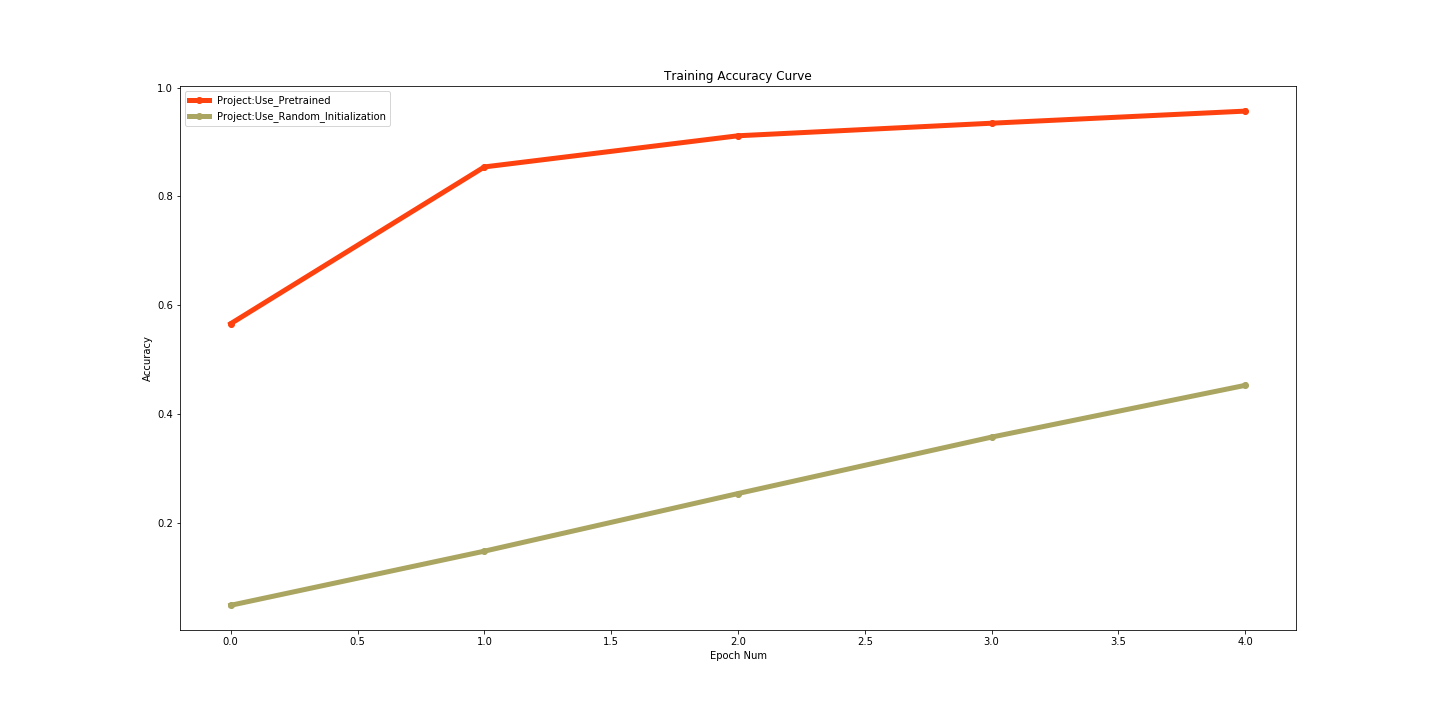

In [23]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-using-pretrained-model/train_accuracy.png") 

### Training Loss Curves

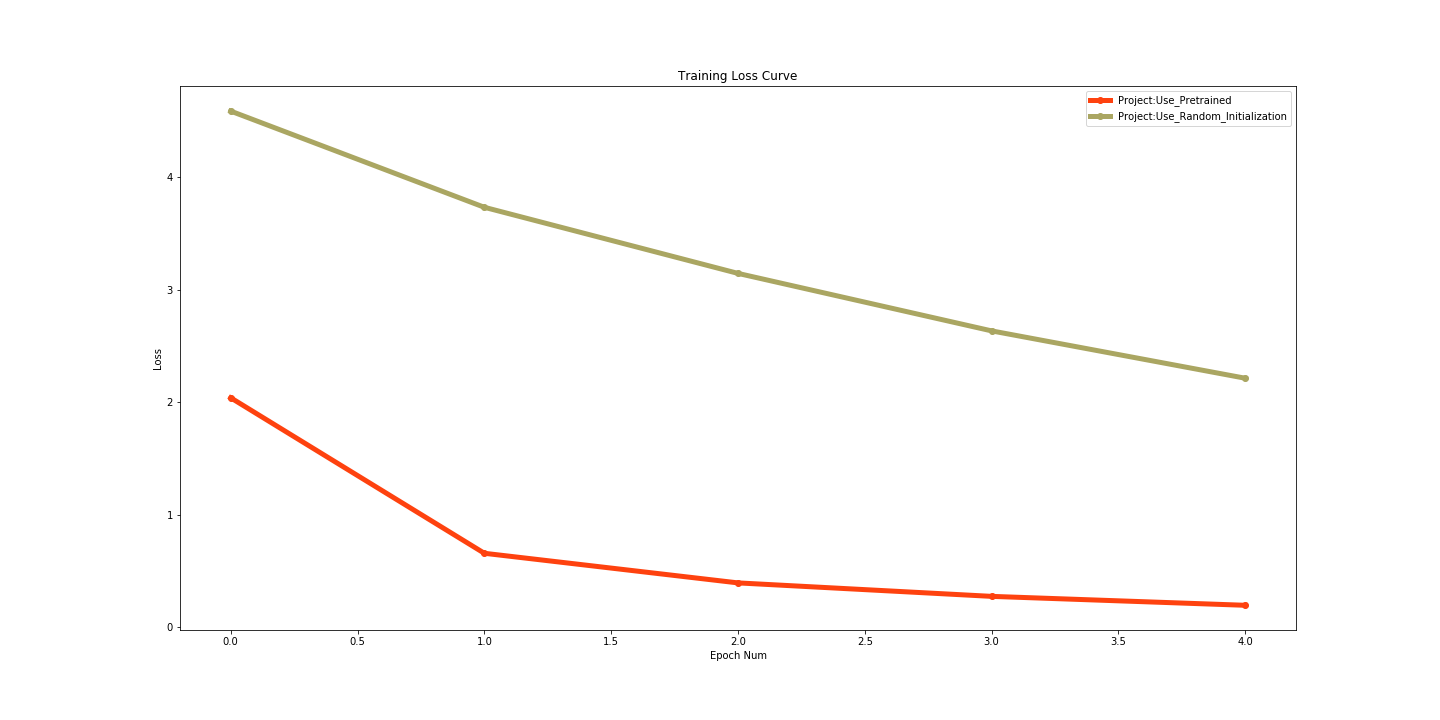

In [24]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-using-pretrained-model/train_loss.png") 

### Validation Accuracy Curves

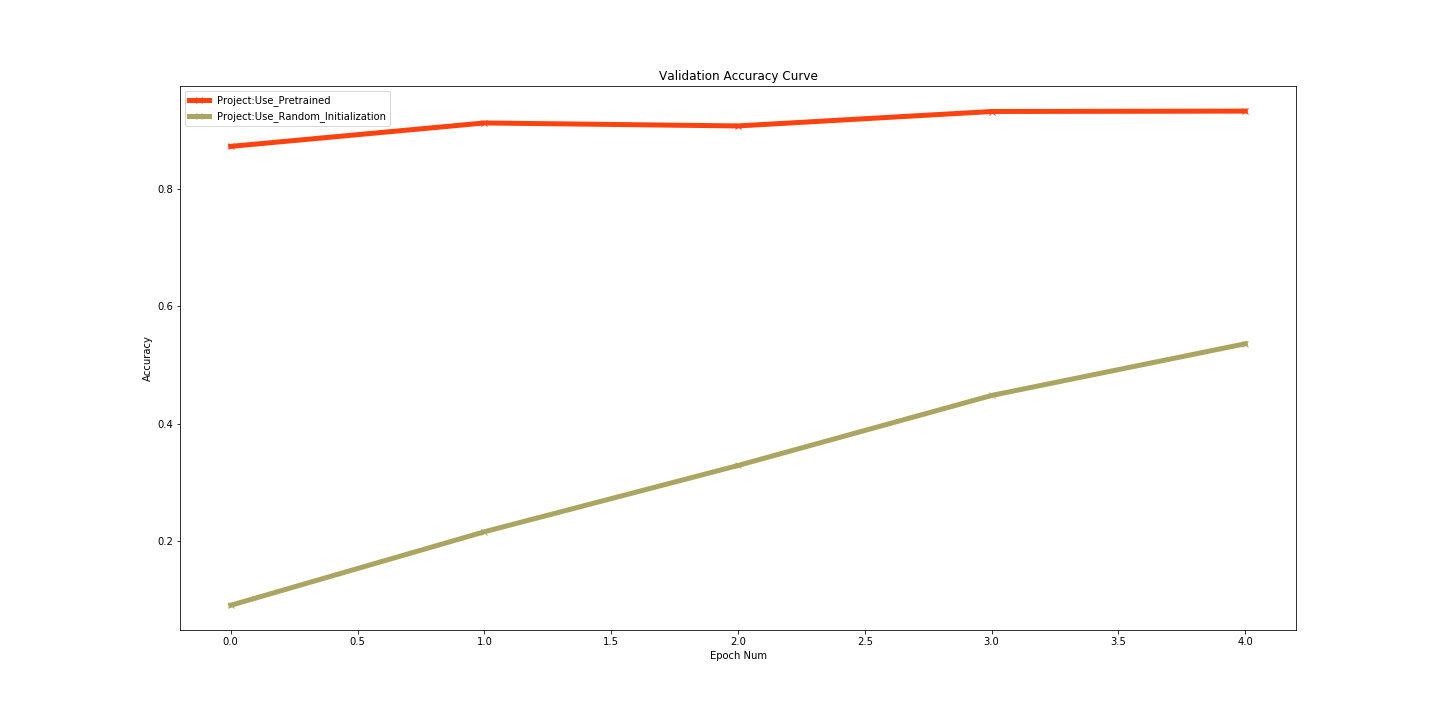

In [25]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-using-pretrained-model/val_accuracy.png") 

### Validation loss curves

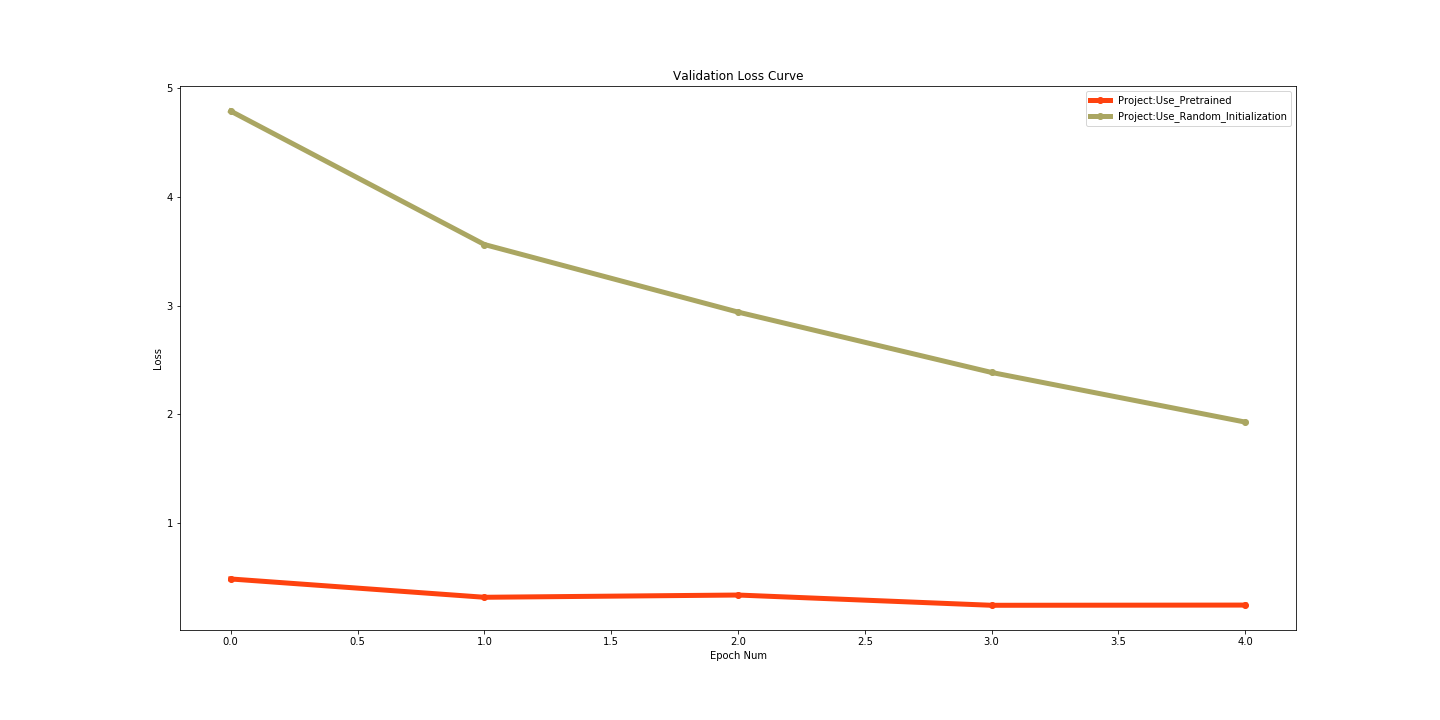

In [26]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-using-pretrained-model/val_loss.png") 

## Accuracies achieved on validation dataset

### With pretrained weights - 94.53
### Without pretrained weights - 1.46

#### For this classifier, keeping the base network inistalized with pretrained weights seems to be a good option for lesser epochs. 

(You may get a different result)